<a href="https://colab.research.google.com/github/jainakki16/Stroke-Prediction/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd

import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/jainakki16/Stroke-Prediction/main/dataset.csv')
data.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
740,52580,Female,27.0,0,0,No,Private,Rural,75.04,24.5,never smoked,0
612,46809,Male,48.0,0,0,Yes,Private,Rural,147.14,22.3,Unknown,0
875,60957,Male,45.0,0,0,Yes,Private,Rural,73.01,24.8,formerly smoked,0
3831,65673,Female,55.0,0,0,No,Self-employed,Rural,67.10,31.4,never smoked,0
3959,37608,Female,38.0,0,0,No,Private,Urban,218.60,47.9,formerly smoked,0


In [3]:
data.shape 

(5110, 12)

In [4]:
data.rename(columns={'Residence_type':'residence_type','ever_married':'married'}, inplace=True)
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# EDA

In [5]:
stroke_df = data.copy(deep=True)
stroke_df.drop('id', axis=1, inplace=True)
stroke_df.head()

,gender,age,hypertension,heart_disease,married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


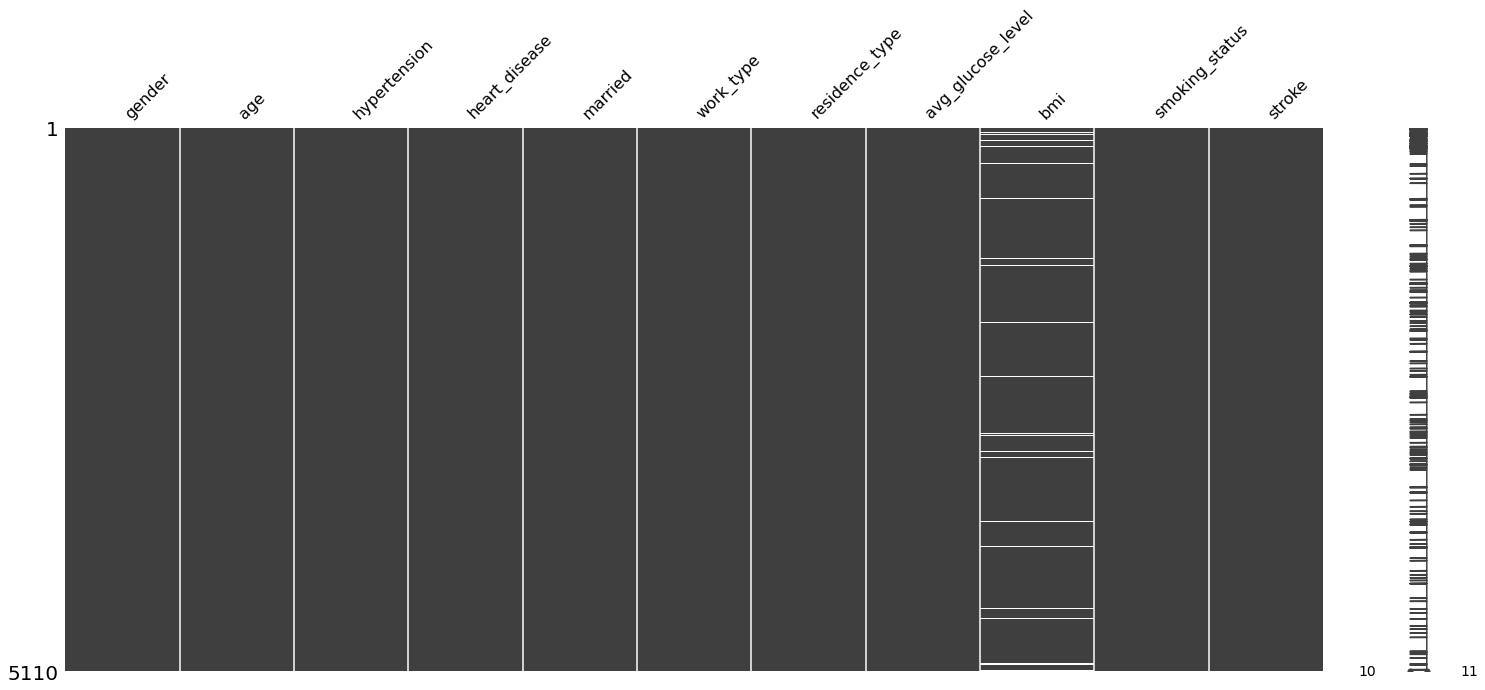

In [6]:
msno.matrix(stroke_df)
plt.show()

In [7]:
stroke_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
married                0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Univariate Analysis

## Helper Functions

In [8]:
def get_pie_chart(data, labels, title): 
  fig, ax = plt.subplots(1, 1, figsize=(8, 6))

  ax.pie(x = data, 
        labels = labels, 
        explode = [0, 0.2],
        autopct = '%1.1f%%', 
        textprops = {'fontsize': 14}, 
        shadow = True)

  ax.set_title(title, size=14)
  plt.show()

In [9]:
def get_categ_plot(data):
  fig, ax = plt.subplots(3, 1, figsize=(11, 9), sharex=True)

  sns.distplot(x=data, ax=ax[0], kde=True)
  ax[0].set_title('Distplot')

  sns.boxplot(x=data, ax=ax[1])
  ax[1].set_title('Boxplot')

  sns.violinplot(x=data, ax=ax[2])
  ax[2].set_title('Violinplot')

  plt.show()

## Categorical Variables

Univariate Analysis of Categorical Variables

### Binary Variables

Univariate Analysis of Categorical Binary Variables

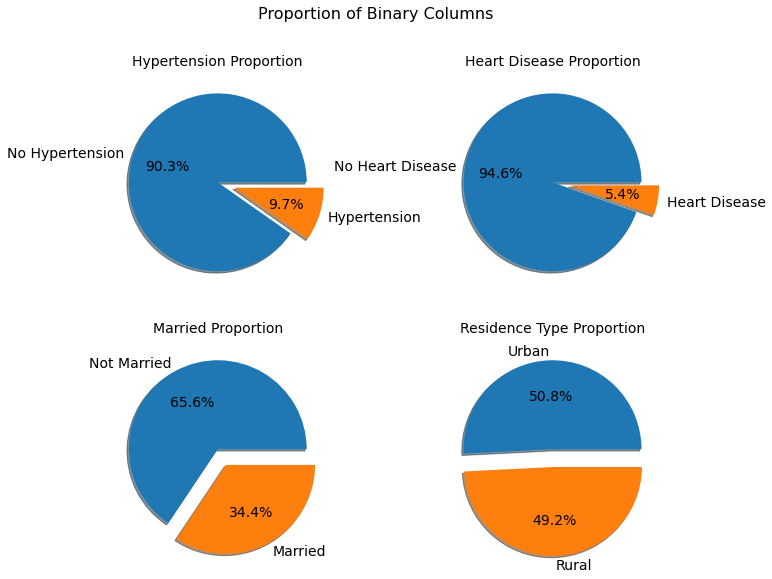

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(11, 9))
binary_feature = ['hypertension','heart_disease','married','residence_type']

for i in range(len(binary_feature)):
  feature = binary_feature[i]
  prop_data = stroke_df[feature].value_counts(normalize=True)
  feature = ' '.join(feature.split('_')).title()

  if feature == 'Married':
    labels = ['Not Married', 'Married']
  elif feature == 'Residence Type':
    labels = prop_data.index
  else:
    labels = ['No '+ feature,feature]
  

  ax[i // 2,i % 2].pie(x = prop_data, 
      labels = labels,
      explode = [0, 0.2],
      autopct = '%1.1f%%', 
      textprops = {'fontsize': 14}, 
      shadow = True)
  ax[i // 2,i % 2].set_title(feature+' Proportion', size=14)
fig.suptitle('Proportion of Binary Columns',size=16)    
plt.show()

### Non-Binary variables

Univariate Analysis of Non-Categorical Binary Variables

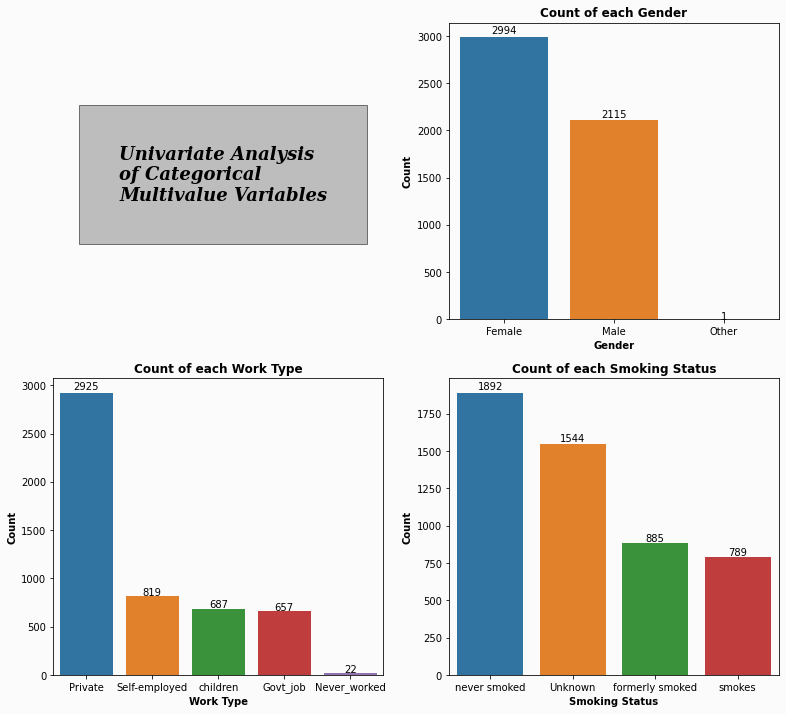

In [11]:
non_bin_columns = ['','gender','work_type', 'smoking_status']

fig, ax = plt.subplots(2, 2, figsize=(13, 12))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)

for i in range(len(non_bin_columns)):
  ax[i // 2,i % 2].set_facecolor(background_color)
  if i == 0:
    ax[i // 2,i % 2].text(x=0.2, y=0.4, 
                          s='Univariate Analysis \nof Categorical \nMultivalue Variables', 
                          fontsize=18, fontfamily='serif', fontweight='bold', fontstyle='italic',
                          bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 40})
    ax[i//2,i%2].axis('off')
  else:
    feature = non_bin_columns[i]
    feature_count = stroke_df[feature].value_counts().reset_index().rename(columns={feature:'count', 'index':feature})
    plot = sns.barplot(data=feature_count, y='count', x=feature,ax=ax[i // 2,i % 2])

    for index, row in feature_count.iterrows():
        plot.text(x=index, y=row['count']*1.012, s=row['count'], 
                  ha='center', color='black')
    
    feature = ' '.join(feature.split('_')).title()
    ax[i // 2,i % 2].set_title('Count of each '+ feature, fontsize=12, fontweight='bold')
    ax[i // 2,i % 2].set_xlabel(feature, fontweight='bold')
    ax[i // 2,i % 2].set_ylabel('Count', fontweight='bold')
plt.show()

## Continuous Variables
Univariate Analysis of Categorical Variables

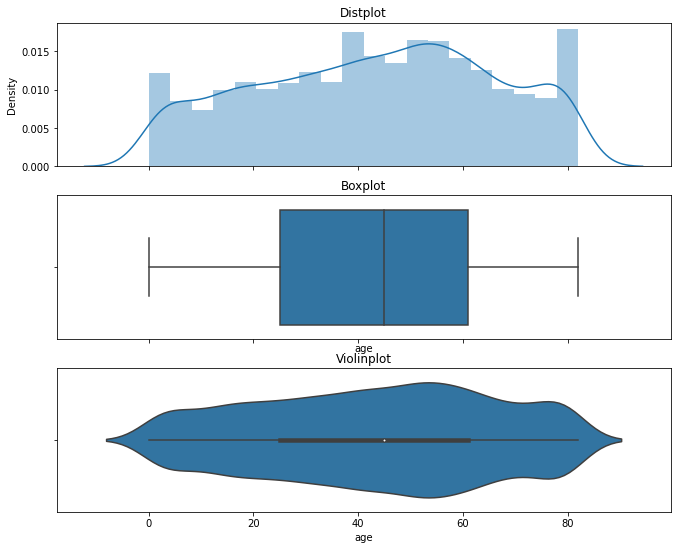

In [12]:
get_categ_plot(stroke_df.age)

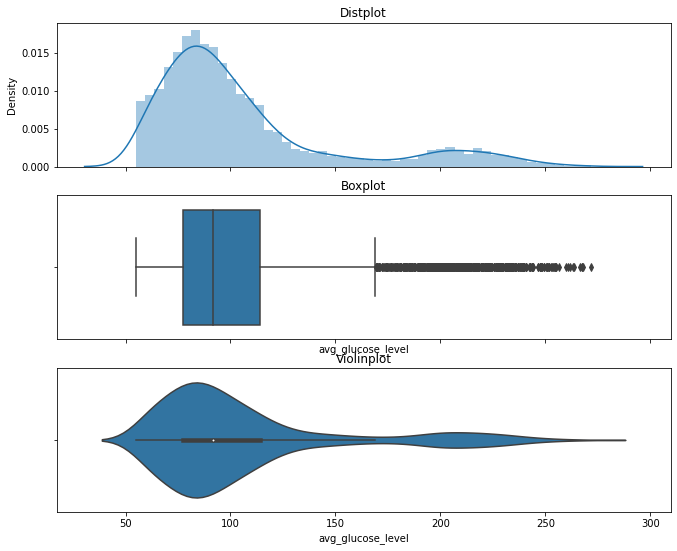

In [13]:
get_categ_plot(stroke_df.avg_glucose_level)

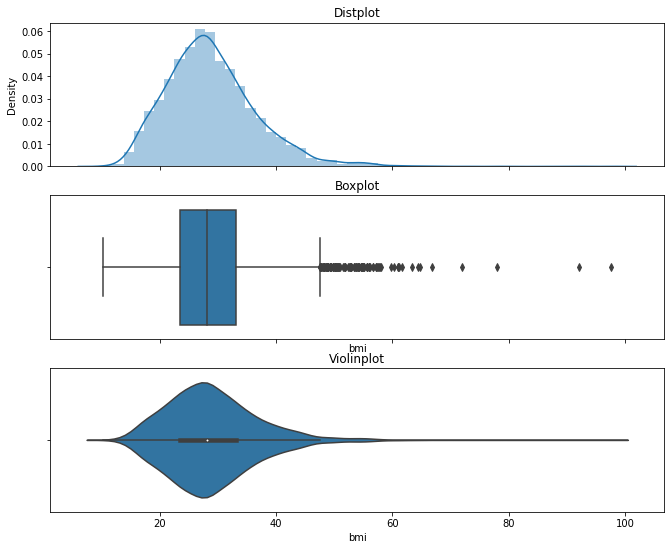

In [14]:
get_categ_plot(stroke_df.bmi)

## Target Variable

In [15]:
def horizontal_bars(name,prop,title):
  '''
  name: column name
  prop: proportion of male/female show-up 
  title: title of graph
  return: horizontal bar graph
  '''
  fig, ax = plt.subplots(figsize =(10, 5))
  ax.barh(name, prop, color=['green', 'red'])

  # To add grid
  ax.grid(b = True, color ='grey',
          linestyle ='-.', linewidth = 0.5,
          alpha = 0.2)

  # To remove axes
  for s in ['top', 'bottom', 'left', 'right']:
      ax.spines[s].set_visible(False)

  # To remove x and y ticks
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')

  plt.xticks(fontsize=10)
  plt.yticks(fontsize=12)

  # Add padding between axes and labels
  ax.xaxis.set_tick_params(pad = 5)
  ax.yaxis.set_tick_params(pad = 15)

  plt.xlabel('\n\nProportion of strokes',fontsize=12)
  plt.ylabel('Stroke',fontsize=12)
  ax.set_title(title,fontsize = 15 )

  for i in ax.patches:
      plt.text(i.get_width()+0.01, i.get_y()+0.4,
              str(round((i.get_width()), 2)),
              fontsize = 12, fontweight ='bold',
              color ='grey')
      
  plt.show()

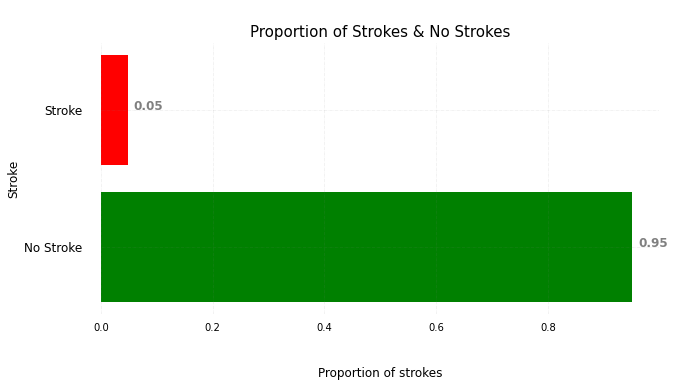

In [16]:
horizontal_bars(['No Stroke', 'Stroke'], 
                [stroke_df.stroke.value_counts(normalize=True)[0], 
                 stroke_df.stroke.value_counts(normalize=True)[1]], 
                '\nProportion of Strokes & No Strokes')

# Bivariate Analysis

## Correlation Matrix

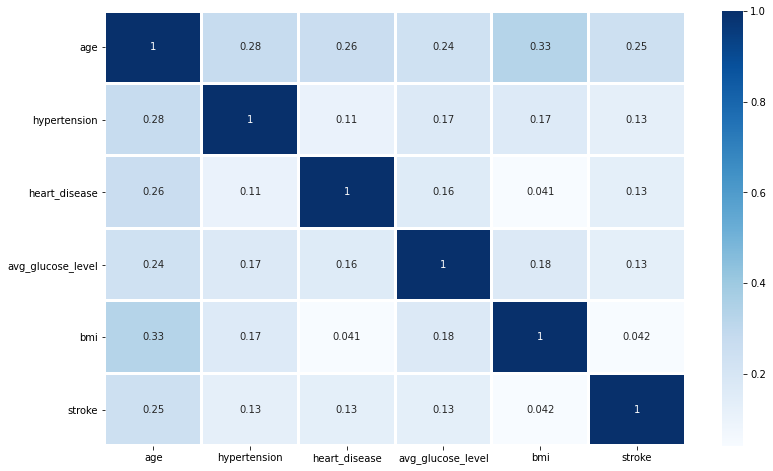

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))
sns.heatmap(stroke_df.corr(), annot=True, ax=ax, linewidth=2, cmap='Blues')
plt.show()

In [18]:
stroke_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## Categorical  - gender, married, work_type, residence_type, smoking_status

## Quantative - age(create bins acc. to 10)

## Stroke and Categorical

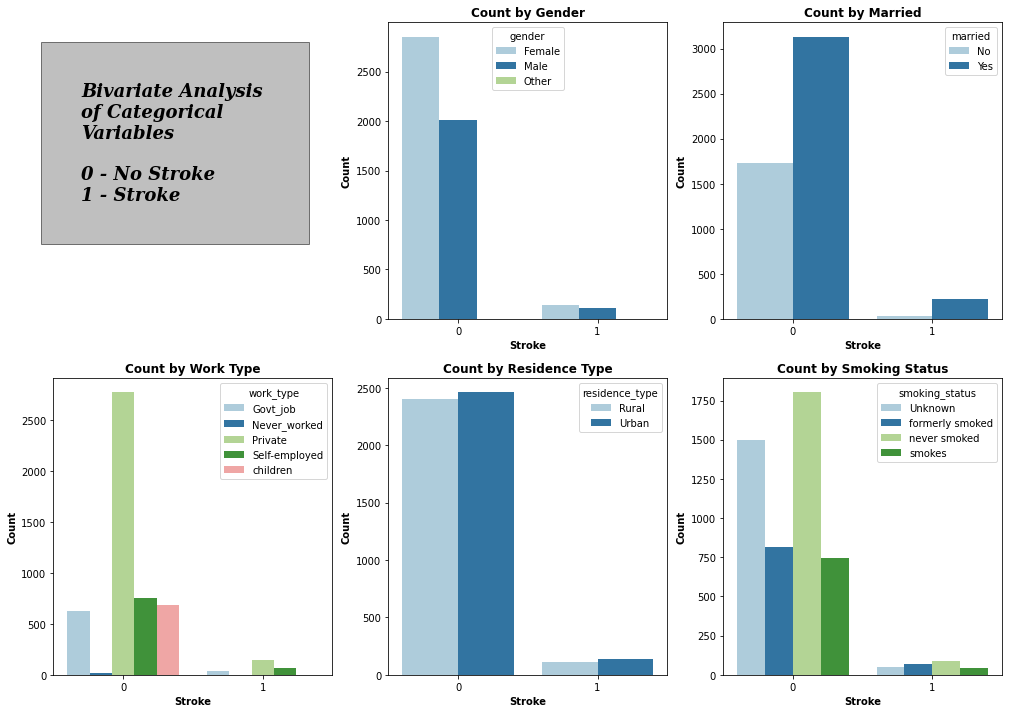

In [19]:
categorical_columns = ['', 'gender', 'married', 'work_type', 'residence_type', 'smoking_status']

fig, ax = plt.subplots(2, 3, figsize=(17, 12))
for i in range(len(categorical_columns)):
  if i == 0:
    ax[i // 2,i % 2].text(x=0.1, y=0.4, 
                          s='Bivariate Analysis \nof Categorical \nVariables\n\n0 - No Stroke\n1 - Stroke', 
                          fontsize=18, fontfamily='serif', fontweight='bold', fontstyle='italic',
                          bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 40})
    ax[i//2,i%2].axis('off')
  else:
    column = categorical_columns[i]
    extracted_df = stroke_df.groupby([column, 'stroke']).size().reset_index(name='count')
    graph = sns.barplot(data=extracted_df, x='stroke', y='count', 
                      hue=column, palette='Paired', ax=ax[i//3, i%3])

    graph.set_xlabel('Stroke', fontweight='bold')
    graph.set_ylabel('Count', fontweight='bold')
    graph.set_title('Count by ' + ' '.join(column.split('_')).title(), fontweight='bold')

plt.show()

## Stroke and Age

In [20]:
stroke_age = stroke_df[['age', 'stroke']]
bin_labels = [str(i) + ' - ' + str(i+9) for i in range(1, 90, 10)]
stroke_age['age_interval'] = pd.cut(x=stroke_age.age, bins=range(0, 100, 10), labels=bin_labels)
stroke_age

,age,stroke,age_interval
0,67.0,1,61 - 70
1,61.0,1,61 - 70
2,80.0,1,71 - 80
3,49.0,1,41 - 50
4,79.0,1,71 - 80
...,...,...,...
5105,80.0,0,71 - 80
5106,81.0,0,81 - 90
5107,35.0,0,31 - 40
5108,51.0,0,51 - 60


In [21]:
no_strokes = stroke_age.groupby(by='age_interval').sum().stroke
total_people = stroke_age.groupby(by='age_interval').count().stroke

In [22]:
prop_stroke = (no_strokes/total_people*100).reset_index(name='prop_of_stroke')
prop_stroke

,age_interval,prop_of_stroke
0,1 - 10,0.197239
1,11 - 20,0.193050
2,21 - 30,0.000000
3,31 - 40,0.890208
4,41 - 50,2.029770
5,51 - 60,5.953827
6,61 - 70,8.249158
7,71 - 80,17.676768
8,81 - 90,19.827586


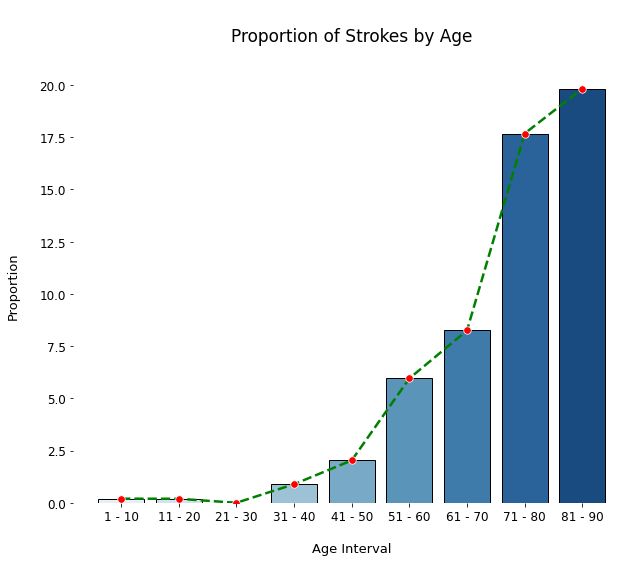

In [23]:
plt.figure(figsize=(10,8))
sns.barplot(data=prop_stroke,x='age_interval', y='prop_of_stroke',
            palette='Blues',edgecolor='black')
sns.lineplot(data=prop_stroke,x='age_interval', y='prop_of_stroke',
             marker='o',markerfacecolor='red',markeredgecolor='white',
             markersize=7.5,color='green',linewidth=2.5,linestyle='dashed')
plt.xlabel('\nAge Interval',fontsize=13)
plt.ylabel('Proportion\n',fontsize=13)
plt.title('\nProportion of Strokes by Age\n',fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine( left=True, bottom=True)
plt.show()

In [24]:
stroke_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [25]:
stroke_df.head(10)

,gender,age,hypertension,heart_disease,married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


# To DO
1. hypertension	heart_disease

2. avg_glucose_level,	bmi